In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/free-spoken-digit-dataset-master/free-spoken-digit-dataset-master"))

# Any results you write to the current directory are saved as output.

['metadata.py', '__init__.py', 'utils', '.gitignore', 'acquire_data', 'recordings', 'pip_requirements.txt', 'README.md']


In [2]:
import librosa
import os
from os.path import isdir, join
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.io import wavfile
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
data_path = '../input/free-spoken-digit-dataset-master/free-spoken-digit-dataset-master/recordings'

In [4]:
def load_speeches(path):
    waves = [f for f in os.listdir(path) if f.endswith('.wav')]
    labels = []
    samples_rate = []
    all_waves = []
    for wav in waves:
        sample_rate, samples = wavfile.read(join(path,wav))
        samples_rate.append(sample_rate)
        labels.append(wav[0])
        all_waves.append(samples)
    return all_waves ,samples_rate,labels

In [5]:
def get_spectrograms(waves):
    sample_rate = 8000
    spectros = []
    freqs = []
    tims = []
    for wav in waves:
        frequencies, times, spectrogram = signal.spectrogram(wav, sample_rate)
        freqs.append(frequencies)
        tims.append(times)
        spectros.append(spectrogram)
    return freqs,tims,spectros
        

In [6]:
all_waves,samples_rate,labels = load_speeches(data_path)

In [7]:
max_sequence_len = max([len(x) for x in all_waves])
all_waves = np.array(pad_sequences(all_waves, maxlen=max_sequence_len, padding='post'))


In [8]:
freqs,tims,spectros = get_spectrograms(all_waves)

In [9]:
spectros[3].shape

(129, 81)

In [10]:
spectros = np.array(spectros)
spectros = spectros.reshape(2000,129,81,1)

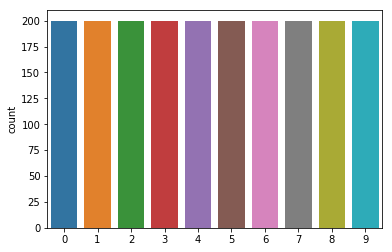

In [11]:
sns.countplot(labels)

In [12]:
import keras
labels = keras.utils.to_categorical(labels, 10)

Using TensorFlow backend.


In [13]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(spectros, labels, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Input, layers
from tensorflow.keras import backend as K
import tensorflow as tf

In [15]:
X.shape[1:]

(129, 81, 1)

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', input_shape=(129, 81,1)),
  tf.keras.layers.Conv2D(32,(5,5), activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout((0.25)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
  tf.keras.layers.Dropout((0.25)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout((0.5)),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
#model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer = tf.keras.optimizers.Adam( epsilon=1e-08), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X,Y,batch_size=512,epochs=200,validation_data=(X_test,Y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/200
1600/1600 [==============================] - 3s 2ms/sample - loss: 2221.4144 - acc: 0.1637 - val_loss: 254.2879 - val_acc: 0.3725
Epoch 2/200
1600/1600 [==============================] - 1s 591us/sample - loss: 273.9050 - acc: 0.3025 - val_loss: 23.9129 - val_acc: 0.4075
Epoch 3/200
1600/1600 [==============================] - 1s 598us/sample - loss: 39.7417 - acc: 0.3606 - val_loss: 5.3668 - val_acc: 0.4275
Epoch 4/200
1600/1600 [==============================] - 1s 595us/sample - loss: 10.6449 - acc: 0.3594 - val_loss: 4.4933 - val_acc: 0.4125
Epoch 5/200
1600/1600 [==============================] - 1s 596us/sample - loss: 6.7933 - acc: 0.3487 - val_loss: 3.7855 - val_acc: 0.3650
Epoch 6/200
1600/1600 [==============================] - 1s 593us/sample - loss: 5.3043 - acc: 0.3300 - val_loss: 3.2093 - val_acc: 0.3500
Epoch 7/200
1600/1600 [==============================] - 1s 595us/sample - loss: 4.1374 - acc: 0.3325 - val_los

1600/1600 [==============================] - 1s 594us/sample - loss: 1.0569 - acc: 0.6544 - val_loss: 0.9687 - val_acc: 0.7575
Epoch 60/200
1600/1600 [==============================] - 1s 592us/sample - loss: 1.0527 - acc: 0.6606 - val_loss: 0.9560 - val_acc: 0.7700
Epoch 61/200
1600/1600 [==============================] - 1s 567us/sample - loss: 1.0853 - acc: 0.6737 - val_loss: 0.9429 - val_acc: 0.7650
Epoch 62/200
1600/1600 [==============================] - 1s 594us/sample - loss: 1.1236 - acc: 0.6812 - val_loss: 0.9387 - val_acc: 0.7725
Epoch 63/200
1600/1600 [==============================] - 1s 596us/sample - loss: 1.0143 - acc: 0.6975 - val_loss: 0.9608 - val_acc: 0.7450
Epoch 64/200
1600/1600 [==============================] - 1s 598us/sample - loss: 0.9876 - acc: 0.6825 - val_loss: 0.9895 - val_acc: 0.7275
Epoch 65/200
1600/1600 [==============================] - 1s 601us/sample - loss: 1.0463 - acc: 0.6894 - val_loss: 1.0045 - val_acc: 0.7350
Epoch 66/200
1600/1600 [=========

1600/1600 [==============================] - 1s 596us/sample - loss: 0.6210 - acc: 0.8275 - val_loss: 0.6101 - val_acc: 0.8775
Epoch 118/200
1600/1600 [==============================] - 1s 596us/sample - loss: 0.5911 - acc: 0.8294 - val_loss: 0.5868 - val_acc: 0.8850
Epoch 119/200
1600/1600 [==============================] - 1s 596us/sample - loss: 0.6187 - acc: 0.8181 - val_loss: 0.5890 - val_acc: 0.8775
Epoch 120/200
1600/1600 [==============================] - 1s 601us/sample - loss: 0.6231 - acc: 0.8250 - val_loss: 0.6155 - val_acc: 0.8650
Epoch 121/200
1600/1600 [==============================] - 1s 596us/sample - loss: 0.5995 - acc: 0.8281 - val_loss: 0.6292 - val_acc: 0.8875
Epoch 122/200
1600/1600 [==============================] - 1s 596us/sample - loss: 0.6050 - acc: 0.8381 - val_loss: 0.6217 - val_acc: 0.8875
Epoch 123/200
1600/1600 [==============================] - 1s 599us/sample - loss: 0.5767 - acc: 0.8394 - val_loss: 0.6120 - val_acc: 0.8800
Epoch 124/200
1600/1600 [==

1600/1600 [==============================] - 1s 599us/sample - loss: 0.3797 - acc: 0.9062 - val_loss: 0.4016 - val_acc: 0.9125
Epoch 176/200
1600/1600 [==============================] - 1s 595us/sample - loss: 0.3666 - acc: 0.9013 - val_loss: 0.5017 - val_acc: 0.9150
Epoch 177/200
1600/1600 [==============================] - 1s 598us/sample - loss: 0.3644 - acc: 0.9006 - val_loss: 0.4339 - val_acc: 0.9125
Epoch 178/200
1600/1600 [==============================] - 1s 594us/sample - loss: 0.3504 - acc: 0.9044 - val_loss: 0.4274 - val_acc: 0.9200
Epoch 179/200
1600/1600 [==============================] - 1s 594us/sample - loss: 0.3470 - acc: 0.9062 - val_loss: 0.3881 - val_acc: 0.9175
Epoch 180/200
1600/1600 [==============================] - 1s 594us/sample - loss: 0.3362 - acc: 0.9175 - val_loss: 0.3606 - val_acc: 0.9225
Epoch 181/200
1600/1600 [==============================] - 1s 599us/sample - loss: 0.3665 - acc: 0.9019 - val_loss: 0.3721 - val_acc: 0.9225
Epoch 182/200
1600/1600 [==

0.935

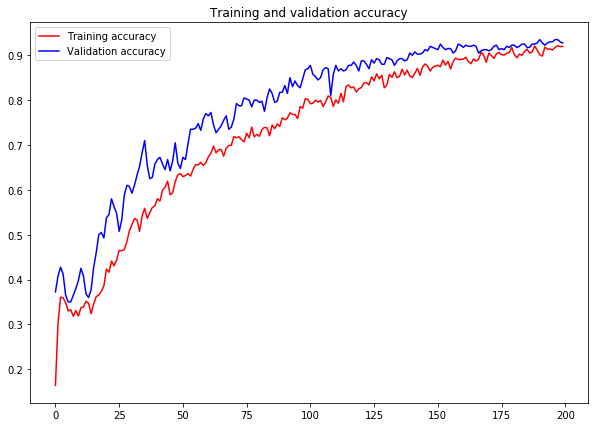

<Figure size 432x288 with 0 Axes>

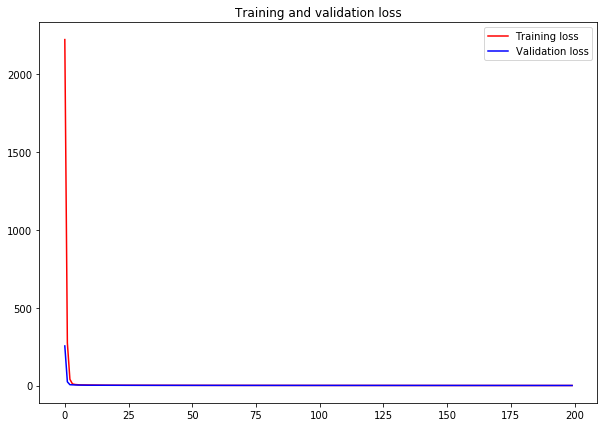

<Figure size 432x288 with 0 Axes>

In [21]:

%matplotlib inline
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
history = model.history
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10,7))
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.legend(['Training accuracy','Validation accuracy'])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.legend(['Training loss','Validation loss'])
plt.figure()
max(val_acc) #the best validation accuracy the model have got